posicion inicial de los transistores 
 [(-1, -2, 0), (2, 0, 0)]
mejor solucion parcial  [(0, -1, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0, 0)]
mejor solucion parcial  [(1, 0, 0), (2, 0,

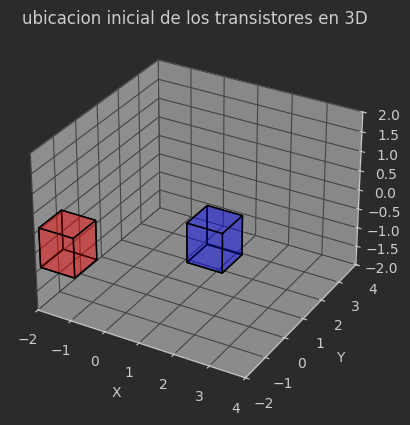

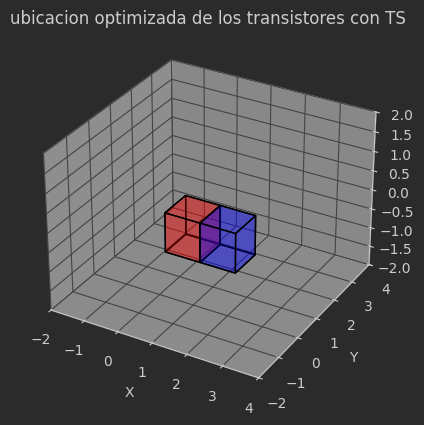

mejor disposicion de los transistores: [(1, 0, 0), (2, 0, 0)]
distancia total minima: 2.0


In [ ]:
# -*- coding: utf-8 -*-
"""ae_ts_gate_not_01.ipynb

Automatically generated by Colab.

Original file is located at

"""

# -----------------------------------------------------------------------------
#                     B U S Q E D A   T A B U
#
# Algoritmo TS que optimiza la longitud de conexiones de 2 transistores mosfet
# NMOS y PMOS que conectados conforman una compuerta inversora CMOS
# supongo transistores de dimension 1mm x 1mm x 1mm
#               UBA - MIA 2025 - Algoritmos Evolutivos I
# -----------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

plt.rcParams.update({
    'figure.facecolor': '#2b2b2b',     # fondo exterior
    'axes.facecolor':   '#2b2b2b',     # fondo del área del gráfico
    'axes.edgecolor':   '#cccccc',     # borde de los ejes
    'axes.labelcolor':  '#cccccc',     # etiquetas de los ejes
    'xtick.color':      '#cccccc',     # color de los números en el eje X
    'ytick.color':      '#cccccc',     # color de los números en el eje Y
    'text.color':       '#cccccc',     # color del título y textos
    'grid.color':       '#444444',     # color de la grilla
})

# -----------------------------------------------------------------------------
# matriz de conexiones , debo cambiar a una matriz de 3x3 con d1,s1,g1 en las
# filas y d2,s2,g2 en las columnsa para simplificarlo source gate drain
# -----------------------------------------------------------------------------
conexion_matriz = [
    [0, 0, 0, 1, 0, 0],  # d1, s1, g1, d2, s2, g2
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]


# -----------------------------------------------------------------------------
# terminales de los transistores (caras de un cubo)
# -----------------------------------------------------------------------------
terminales = ['d1', 's1', 'g1', 'd2', 's2', 'g2']


# -----------------------------------------------------------------------------
# posiciones de los terminales (centros de las caras de los cubos en 3D)
# -----------------------------------------------------------------------------
def generar_posiciones_transistores(posiciones_cubos):
    """se genera las posiciones 3D de los terminales de los transistores según
    la posición de los cubos"""
    posiciones_terminales = []
    # Para el primer cubo
    x, y, z = posiciones_cubos[0]
    posiciones_terminales.extend([(x + 0.5, y, z), (x - 0.5, y, z), (x, y + 0.5, z)])
    # Para el segundo cubo
    x, y, z = posiciones_cubos[1]
    posiciones_terminales.extend([(x + 0.5, y, z), (x - 0.5, y, z), (x, y + 0.5, z)])
    return posiciones_terminales


# -----------------------------------------------------------------------------
# se calcula la distancia euclidiana entre dos puntos (en 3D en este caso )
# la dist. euclid. es d=raiz_cuuadrada((x2-x1)^2+(y2-y1)^2+(z2-z1)^2)
# -----------------------------------------------------------------------------
def distancia(punto1, punto2):
    return np.linalg.norm(np.array(punto1) - np.array(punto2))


# -----------------------------------------------------------------------------
# generacion de la matriz de distancias entre los terminales
# -----------------------------------------------------------------------------
def generar_matriz_distancias(posiciones_terminales):
    num_terminales = len(posiciones_terminales)
    matriz_distancias = np.zeros((num_terminales, num_terminales))
    for i in range(num_terminales):
        for j in range(i + 1, num_terminales):
            matriz_distancias[i][j] = distancia(posiciones_terminales[i], posiciones_terminales[j])
            matriz_distancias[j][i] = matriz_distancias[i][j]  # simetria
    return matriz_distancias


# -----------------------------------------------------------------------------
#  distancia total de una ubicacion de los transistores en 3D
# -----------------------------------------------------------------------------
def calcular_distancia_total(matriz_distancias, matriz_conexion):
    distancia_total = 0
    num_terminales = len(matriz_distancias)
    for i in range(num_terminales):
        for j in range(i + 1, num_terminales):
            if matriz_conexion[i][j] == 1:  # si están conectados
                distancia_total =distancia_total + matriz_distancias[i][j]
    return distancia_total


# -----------------------------------------------------------------------------
# se generan aqui los vecindarios intercambiando posiciones de los transistores
# y evitando solpamineto entre ellos
# -----------------------------------------------------------------------------
def generar_vecindarios_unicos(posiciones_cubos):
    vecindarios = []
    for i in range(len(posiciones_cubos)):
        for dx in [-1, 0, 1]:  # cambios en x
            for dy in [-1, 0, 1]:  # cambios en y
                for dz in [-1, 0, 1]:  # cambios en z
                    if (dx, dy, dz) != (0, 0, 0):  # se evita repetir la misma posicion
                        nuevo_vecindario = list(posiciones_cubos)
                        nueva_posicion = (nuevo_vecindario[i][0] + dx, nuevo_vecindario[i][1] + dy, nuevo_vecindario[i][2] + dz)

                        # se comprueba si la nueva posicion es unica
                        otras_posiciones = [p for j, p in enumerate(posiciones_cubos) if j != i]
                        if nueva_posicion not in otras_posiciones:
                            nuevo_vecindario[i] = nueva_posicion
                            movimiento = (i, nueva_posicion)
                            vecindarios.append((nuevo_vecindario, movimiento))
    return vecindarios


# -----------------------------------------------------------------------------
# Algoritmo de busqueda tabu para minimizar la distancia total entre conexiones
# -----------------------------------------------------------------------------
def busqueda_tabu(posiciones_iniciales, matriz_conexion, num_iteraciones, tamanio_lista_tabu):
    solucion_actual = posiciones_iniciales[:]
    posiciones_terminales = generar_posiciones_transistores(solucion_actual)
    matriz_distancias = generar_matriz_distancias(posiciones_terminales)  # genera matriz de distancias

    mejor_solucion = solucion_actual[:]
    mejor_distancia = calcular_distancia_total(matriz_distancias, matriz_conexion)
    lista_tabu = []

    for iteracion in range(num_iteraciones):
        vecindarios = generar_vecindarios_unicos(solucion_actual)
        mejor_vecindario = None
        mejor_movimiento_candidato = None
        mejor_vecindario_distancia = float('inf')

        for vecindario, movimiento in vecindarios:
            posiciones_terminales = generar_posiciones_transistores(vecindario)
            matriz_distancias = generar_matriz_distancias(posiciones_terminales)  # actualiza matriz de distancias
            distancia_vecindario = calcular_distancia_total(matriz_distancias, matriz_conexion)

            if (movimiento not in lista_tabu) or (distancia_vecindario < mejor_distancia):
                if distancia_vecindario < mejor_vecindario_distancia:
                    mejor_vecindario = vecindario
                    mejor_vecindario_distancia = distancia_vecindario
                    mejor_movimiento_candidato = movimiento

        if mejor_vecindario is None:
            continue  # no se encontró un mejor vecindario, se controla porque
                      # se inicializa mejor_vecino con None

        solucion_actual = mejor_vecindario[:]
        lista_tabu.append(mejor_movimiento_candidato)

        if len(lista_tabu) > tamanio_lista_tabu:
            lista_tabu.pop(0)

        if mejor_vecindario_distancia < mejor_distancia:
            mejor_solucion = mejor_vecindario[:]
            mejor_distancia = mejor_vecindario_distancia
        print("mejor solucion parcial ", mejor_solucion)
    return mejor_solucion, mejor_distancia


# -----------------------------------------------------------------------------
# con esta funcion se grafica un transistor en una posicion dada
# -----------------------------------------------------------------------------
def graficar_transistor(ax, posicion, color='r'):
    # definir los vertices del cubo
    r = [-0.5, 0.5]

    vertices = []
    for x_offset in r:
        for y_offset in r:
            for z_offset in r:
                vertices.append((x_offset + posicion[0], y_offset + posicion[1], z_offset + posicion[2]))

    # Definir las caras conectando los vértices
    caras = [
        [vertices[0], vertices[1], vertices[3], vertices[2]],
        [vertices[4], vertices[5], vertices[7], vertices[6]],
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[2], vertices[3], vertices[7], vertices[6]],
        [vertices[0], vertices[2], vertices[6], vertices[4]],
        [vertices[1], vertices[3], vertices[7], vertices[5]]
    ]
    # se dibujan las caras del cubo a la grafica
    ax.add_collection3d(Poly3DCollection(caras, facecolors=color, linewidths=1, edgecolors='k', alpha=0.25))


# -----------------------------------------------------------------------------
# parametros iniciales
# -----------------------------------------------------------------------------
posiciones_iniciales = [(-1, -2, 0), (2, 0, 0)]  # Posiciones de los cubos (Q1 y Q2)
num_iteraciones = 50
tamanio_lista_tabu = 5

# -----------------------------------------------------------------------------
# se grafican los transistores en sus posiciones iniciales
# -----------------------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print("posicion inicial de los transistores \n", posiciones_iniciales)
graficar_transistor(ax, posiciones_iniciales[0], color='r')  # dibujo transistor Q1
graficar_transistor(ax, posiciones_iniciales[1], color='b')  # dibujo transistor Q2


# -----------------------------------------------------------------------------
# definicion de limites y etiquetas de ejes
# -----------------------------------------------------------------------------
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('ubicacion inicial de los transistores en 3D')

mejor_solucion, mejor_distancia = busqueda_tabu(posiciones_iniciales, conexion_matriz, num_iteraciones, tamanio_lista_tabu)

# -----------------------------------------------------------------------------
# se grafica los transistores en sus posiciones finales
# -----------------------------------------------------------------------------
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(mejor_solucion)
graficar_transistor(ax, mejor_solucion[0], color='r')  # dibujo transistor Q1
graficar_transistor(ax, mejor_solucion[1], color='b')  # dibujo transistor Q2

# -----------------------------------------------------------------------------
# definicion de limites y etiquetas de ejes
# -----------------------------------------------------------------------------
ax.set_xlim([-2, 4])
ax.set_ylim([-2, 4])
ax.set_zlim([-2, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('ubicacion optimizada de los transistores con TS')

plt.show()

print(f"mejor disposicion de los transistores: {mejor_solucion}")
print(f"distancia total minima: {mejor_distancia}")